In [1]:
import numpy as np
import subtractr
import matplotlib.pyplot as plt
import matplotlib as mpl
import subtractr.utils as utils

In [2]:
results = np.load('../figures/pv_patch/230124_PVtDT_hSynDOchrm2fGc8_IC_012423_InVivo_Cell1_2_A_cmReformat_subtraction_comparison_results.npz', allow_pickle=True)

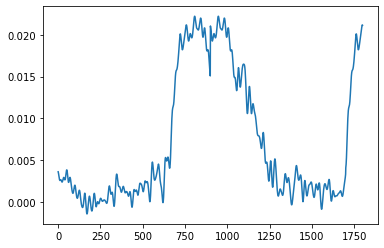

In [9]:
pscs_test = results['multispot'].item()['raw']
t1, t2, = pscs_test[0], pscs_test[1]
plt.plot(np.concatenate((t1, t2[100:], t2[:100])))


In [10]:
def reorder_model_state(model_state, targets):
    """
    Sort results dictionary so that items are ordered by their (xyz) position in space.
    This is critical for comparing inferred maps between single and multispot data. 
    We assume that the results dictionary is the results of running
    subtract_utils.run_subtraction_pipeline
    """
    N = targets.shape[0]

    print(targets.shape)

    # ensure that targets are in the right order so that things work when reshaped
    idxs = np.lexsort((targets[:, -1], targets[:, -2], targets[:, -3]))

    # reorder everything in results
    for (key, value) in model_state.items():
        # first condition ensures we don't index into zero-length tuple
        if value.shape and value.shape[0] == N:
            model_state[key] = value[idxs]

    return model_state

In [14]:
ms_results = results['multispot'].item()
targets = results['targets']
model_state = ms_results['model_state_subtraction_off']

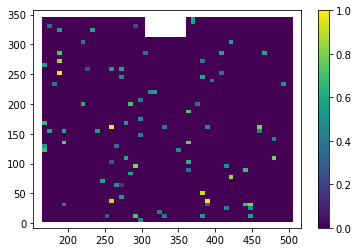

In [24]:
fig, ax = plt.subplots()
sc = plt.scatter(targets[:, 0], targets[:, 1], c=model_state['mu'], marker='s')
fig.colorbar(sc, ax=ax)

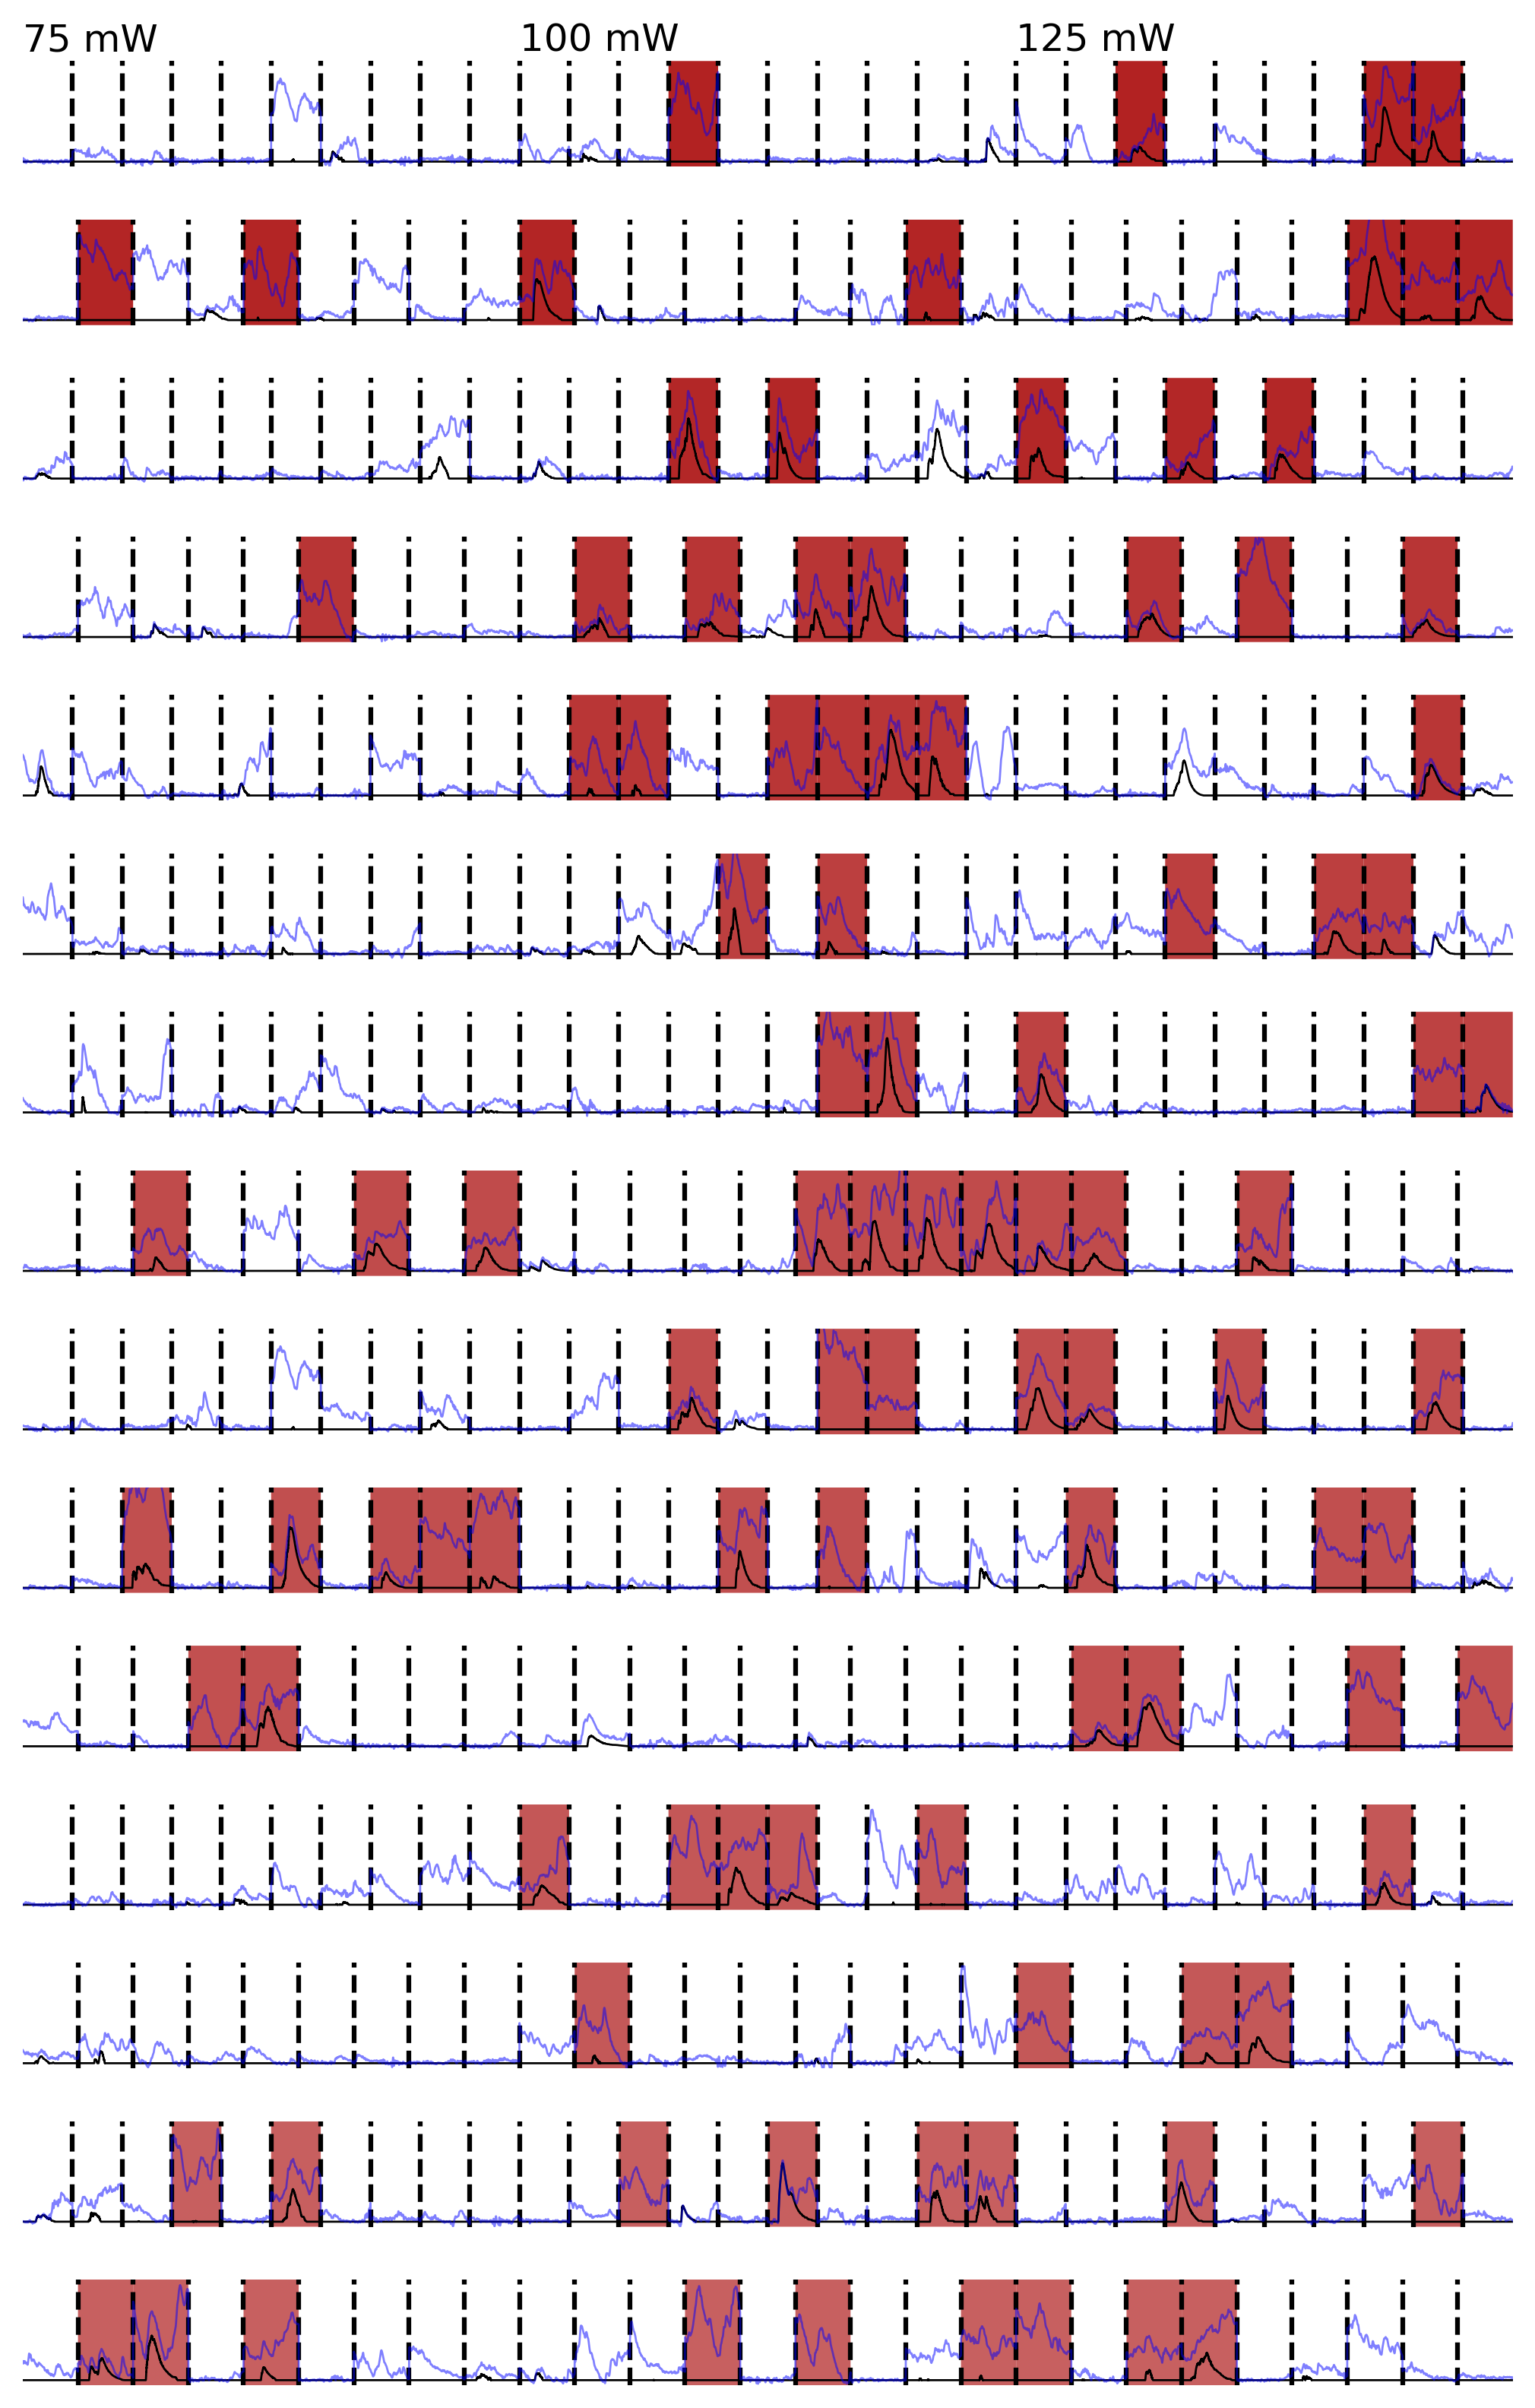

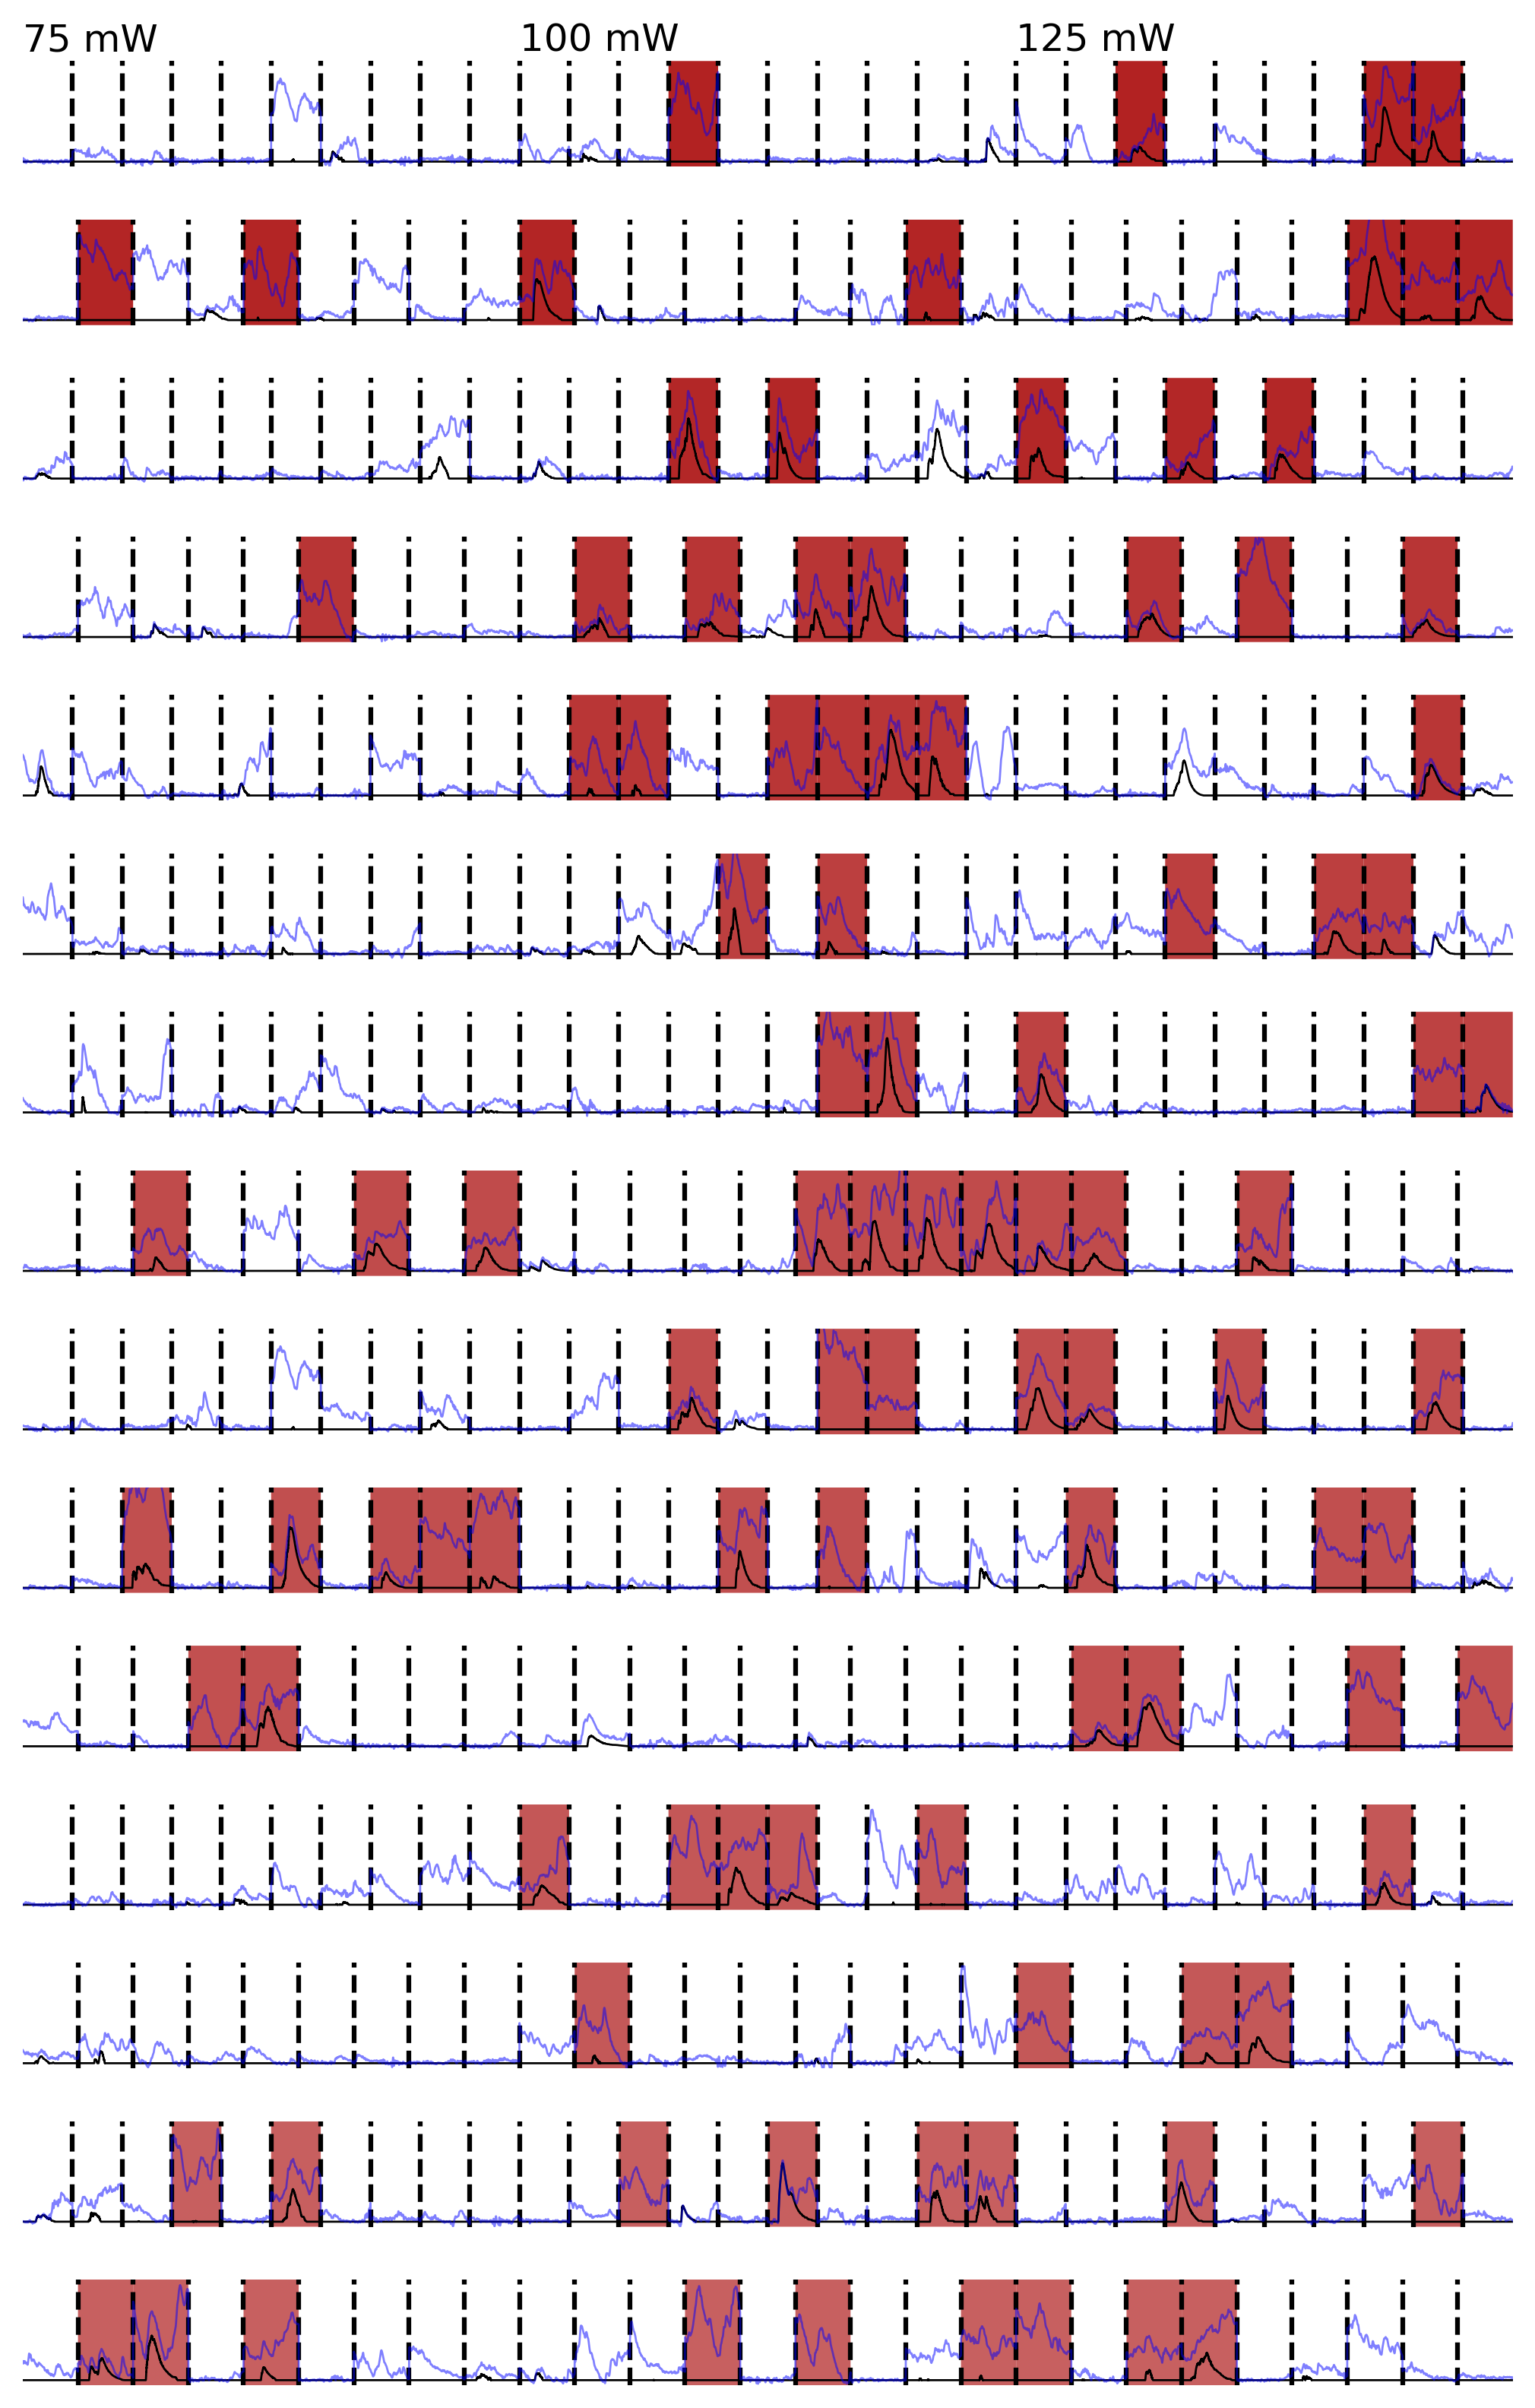

In [15]:
powers = ms_results['stim_mat'].max(axis=0)
utils.plot_spike_inference_with_waveforms(ms_results['demixed'],
    ms_results['stim_mat'], powers, model_state, raw_psc=ms_results['raw'],)